In [20]:
#importing important libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [10]:
data=sm.datasets.fair.load_pandas().data

In [11]:
data=pd.DataFrame(data)
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [12]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [16]:
y=data['affairs']
x=data.drop(['affairs'],axis=1)

In [17]:
x

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0
...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0


In [18]:
y

0       0.111111
1       3.230769
2       1.400000
3       0.727273
4       4.666666
          ...   
6361    0.000000
6362    0.000000
6363    0.000000
6364    0.000000
6365    0.000000
Name: affairs, Length: 6366, dtype: float64

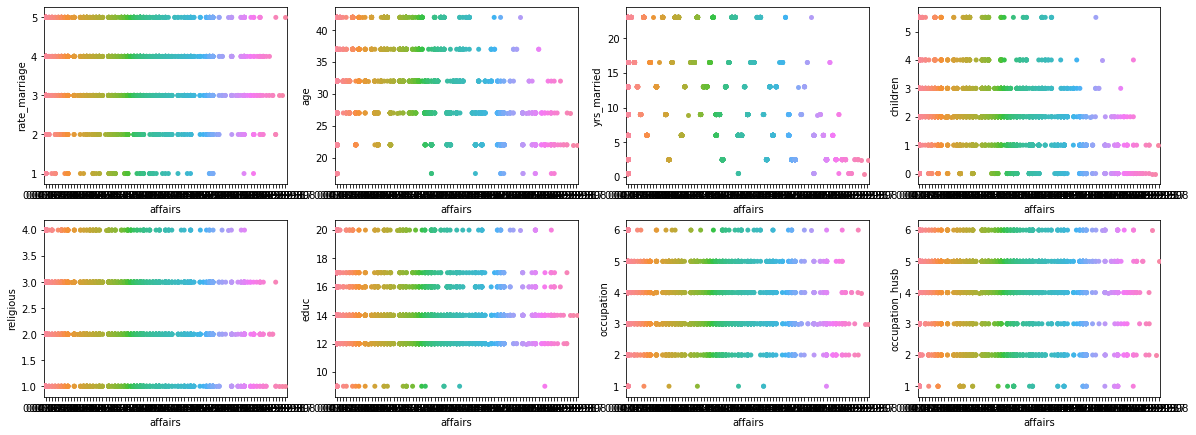

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1
i=1
for column in x:
    if plotnumber<=len(x) :
            ax = plt.subplot(4,4,plotnumber)
            sns.stripplot(y,x[column])
            plotnumber+=1
plt.show()

In [27]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [28]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


In [33]:
Y=[]
for i in y:
    Y.append(round(i))
Y    

[0,
 3,
 1,
 1,
 5,
 5,
 1,
 2,
 5,
 1,
 3,
 2,
 0,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 8,
 3,
 1,
 1,
 1,
 5,
 0,
 1,
 1,
 11,
 1,
 2,
 0,
 1,
 1,
 1,
 7,
 1,
 0,
 0,
 1,
 3,
 2,
 8,
 8,
 0,
 5,
 0,
 0,
 1,
 5,
 1,
 5,
 3,
 1,
 1,
 0,
 8,
 1,
 2,
 1,
 1,
 2,
 1,
 7,
 1,
 2,
 2,
 27,
 1,
 2,
 0,
 1,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 5,
 5,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 5,
 1,
 2,
 5,
 5,
 2,
 1,
 0,
 2,
 1,
 8,
 1,
 3,
 1,
 7,
 3,
 5,
 2,
 0,
 1,
 3,
 11,
 2,
 1,
 1,
 0,
 2,
 5,
 1,
 2,
 1,
 0,
 3,
 7,
 1,
 1,
 0,
 1,
 2,
 0,
 5,
 1,
 1,
 2,
 1,
 3,
 5,
 1,
 0,
 1,
 8,
 11,
 1,
 5,
 5,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 5,
 7,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 5,
 0,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 8,
 1,
 2,
 1,
 1,
 0,
 2,
 3,
 5,
 0,
 0,
 5,
 1,
 5,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 5,
 26,
 5,
 1,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 2,
 3,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 3,
 0,
 0,
 3,
 0,
 5,
 1,
 1,
 2,
 3,

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y, test_size= 0.25, random_state = 355)

In [37]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
log_reg.score(x_test,y_test)

0.7556532663316583

In [50]:
y_pred = log_reg.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7556532663316583

In [42]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1186,   18,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0],
       [ 169,   16,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  70,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  52,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  40,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0],
       [   6,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  14,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   6,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,    0,  

In [43]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [44]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.865370770338373

In [45]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9850498338870431

In [46]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8752767527675277

In [47]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.926924579914029